# Problem statement

Forecasting passenger count for airlines from the given dataset

In [37]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
airlines =pd.read_excel("Airlines_Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airlines.shape

(96, 2)

In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airlines[airlines.duplicated()]

,Month,Passengers


<b>No null values are there. No duplicate entries are there.</b>

### Data Visualization

<AxesSubplot:>

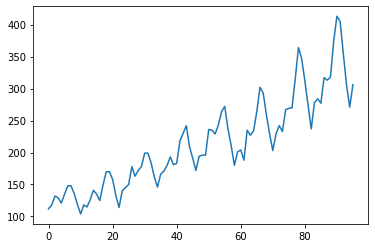

In [9]:
airlines.Passengers.plot()

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

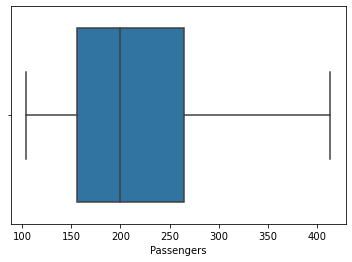

In [42]:
sns.boxplot(airlines['Passengers'])

## Time series decomposition plot

<ipython-input-40-a6d9c11bc547>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")


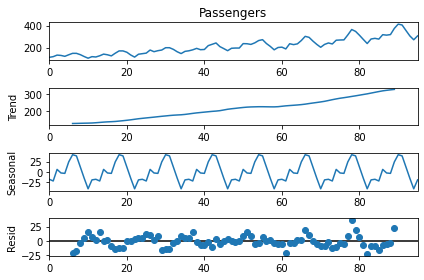

In [40]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()

<ipython-input-41-a95db137d5e8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")


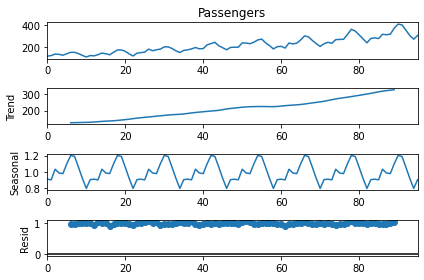

In [41]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

### ACF and PACF plots

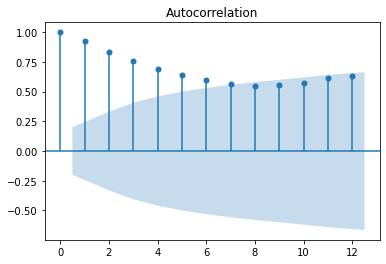

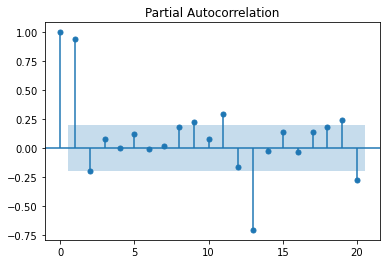

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers)
plt.show()


In [12]:
airlines["Date"] = pd.to_datetime(airlines["Month"],format="%b-%y")
#look for c standard format codes
airlines

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [13]:
airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

In [14]:
airlines

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [15]:
t= np.arange(1,97)
airlines['t']=t
airlines['t_square']=airlines['t']*airlines['t']

In [16]:
airlines

,Month,Passengers,Date,month,year,t,t_square
0,1995-01-01,112,1995-01-01,Jan,1995,1,1
1,1995-02-01,118,1995-02-01,Feb,1995,2,4
2,1995-03-01,132,1995-03-01,Mar,1995,3,9
3,1995-04-01,129,1995-04-01,Apr,1995,4,16
4,1995-05-01,121,1995-05-01,May,1995,5,25
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,92,8464
92,2002-09-01,355,2002-09-01,Sep,2002,93,8649
93,2002-10-01,306,2002-10-01,Oct,2002,94,8836
94,2002-11-01,271,2002-11-01,Nov,2002,95,9025


In [17]:
log_Passengers=np.log(airlines['Passengers'])
airlines['log_Passengers']=log_Passengers

In [18]:
airlines

,Month,Passengers,Date,month,year,t,t_square,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,95,9025,5.602119


In [19]:
airlines = pd.get_dummies(airlines,columns=['month'])

In [21]:
airlines

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting into train and test

In [22]:
train = airlines.head(70)
test = airlines.tail(26)

### Linear model

In [25]:
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

17.681879908211886

### Quadratic model

In [26]:
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742656

### Exponential model

In [27]:
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446902

### Additive seasonality

In [28]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predadd = pd.Series(additive.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828821

### Additive seasonality with linear trend

In [29]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.5020897942713

### Additive seasonality with quadratic trend

In [30]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddquad = pd.Series(addquad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895923845

### Multiplicative seasonality

In [33]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmul = pd.Series(mulsea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

### Multiplicative seasonality with quadratic trend

In [32]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895923845

### Multiplicative seasonality with linear trend

In [34]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmullin = pd.Series(mullin.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmullin))**2))
rmsemul

298.6798189957354

## Tabulating the RMSE values for comparison

In [36]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Values'])

,Model,Values
5,rmselin,17.681880
0,rmse_mul_quad,30.393043
3,rmseaddquad,30.393043
2,rmseaddlinear,34.502090
4,rmseexpo,43.478471
8,rmsequad,43.898145
1,rmseadd,124.975700
7,rmsemulin,298.136614
6,rmsemul,298.679819


<b>We could see that the Linear model shows the least RMSE value, so it is the most suitable model for our data.</b>